# Python Signal
## 信号的概念

* 信号（signal）----进程之间通讯的方式，是一种软件中断。一个进程一旦接收到信号就会打断原来的程序执行流程来处理信号。
* 几个常用信号:
* SIGINT    终止进程     中断进程  (control+c)
* SIGTERM   终止进程     软件终止信号
* SIGKILL   终止进程     杀死进程
* SIGALRM 闹钟信号

### 进程结束信号 SIGTERM和SIGKILL的区别

SIGTERM比较友好，进程能捕捉这个信号，根据您的需要来关闭程序。在关闭程序之前，您可以结束打开的记录文件和完成正在做的任务。在某些情况下，假如进程正在进行作业而且不能中断，那么进程可以忽略这个SIGTERM信号。
对于SIGKILL信号，进程是不能忽略的。这是一个 “我不管您在做什么,立刻停止”的信号。假如您发送SIGKILL信号给进程，Linux就将进程停止在那里。

### 发送信号一般有两种原因:

* 1(被动式)  内核检测到一个系统事件.例如子进程退出会像父进程发送SIGCHLD信号.键盘按下control+c会发送SIGINT信号
* 2(主动式)  通过系统调用kill来向指定进程发送信号

* **操作系统**规定了进程收到信号以后的默认行为
* 但是，我们可以通过绑定信号处理函数来修改进程收到信号以后的行为
* 有两个信号是不可更改的SIGTOP和SIGKILL

**绑定信号处理函数：**

In [2]:
import os
import signal
import time

In [3]:
def onsignal_term(a, b):
    print "收到SIGTERM信号"

In [4]:
#这里是绑定信号处理函数，将SIGTERM绑定在函数onsignal_term上面    
signal.signal(signal.SIGTERM,onsignal_term)   

0

In [7]:
while 1:    
    print '我的进程id是',os.getpid()    
    time.sleep(10)   

我的进程id是 14992
我的进程id是 14992
我的进程id是 14992
我的进程id是 14992
我的进程id是 14992
我的进程id是 14992
我的进程id是 14992


KeyboardInterrupt: 

运行该程序。然后通过另外一个进程来发送信号。

发送消息的代码如下：

In [ ]:
import os    
import signal    
     
#发送信号，16175是前面那个绑定信号处理函数的pid，需要自行修改    
os.kill(16175,signal.SIGTERM) 

使用信号需要特别注意的地方：

如果一个进程收到一个SIGUSR1信号，然后执行信号绑定函数，第二个SIGUSR2信号又来了，第一个信号没有被处理完毕的话，第二个信号就会丢弃。

所以，尽量不要在多线程中使用信号。

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
nd = pd.Series(np.random.randn(600))

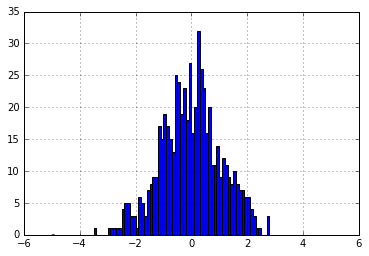

In [6]:
nd.hist(bins=100,range=(-5,5))